In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
df=pd.read_csv('Abalone.csv')


In [4]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


# Checking Datatype for Columns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [6]:
df['Sex'].value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

Here we can see the Sex is Object column which we will chnge it to Numeric for machine to learn the data for prediction

In [7]:
# Label Encoder
from sklearn import preprocessing
lencode=preprocessing.LabelEncoder()
df['Sex']=lencode.fit_transform(df['Sex'])
df.Sex.unique()

array([2, 0, 1])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   int32  
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int32(1), int64(1)
memory usage: 277.5 KB


Now The Data is prepared To check Corelation, EDA to remove outlier,Skewness,isNull and less correlated columns

To Check Output columns Distinct Data

In [9]:
df.Rings.unique()

array([15,  7,  9, 10,  8, 20, 16, 19, 14, 11, 12, 18, 13,  5,  4,  6, 21,
       17, 22,  1,  3, 26, 23, 29,  2, 27, 25, 24], dtype=int64)

Here we can see the The output is incremental/Multiple hence we can assume that Linear Regression and classifier can be used here

# EDA

In [10]:
df.describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,1.052909,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.822240,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [11]:
#checking Skewness: Step 1
df.skew().sort_values(ascending=False)

Height            3.128817
Rings             1.114102
Shucked weight    0.719098
Shell weight      0.620927
Viscera weight    0.591852
Whole weight      0.530959
Sex              -0.098155
Diameter         -0.609198
Length           -0.639873
dtype: float64

Sex                  AxesSubplot(0.125,0.536818;0.110714x0.343182)
Length            AxesSubplot(0.257857,0.536818;0.110714x0.343182)
Diameter          AxesSubplot(0.390714,0.536818;0.110714x0.343182)
Height            AxesSubplot(0.523571,0.536818;0.110714x0.343182)
Whole weight      AxesSubplot(0.656429,0.536818;0.110714x0.343182)
Shucked weight    AxesSubplot(0.789286,0.536818;0.110714x0.343182)
Viscera weight          AxesSubplot(0.125,0.125;0.110714x0.343182)
Shell weight         AxesSubplot(0.257857,0.125;0.110714x0.343182)
Rings                AxesSubplot(0.390714,0.125;0.110714x0.343182)
dtype: object

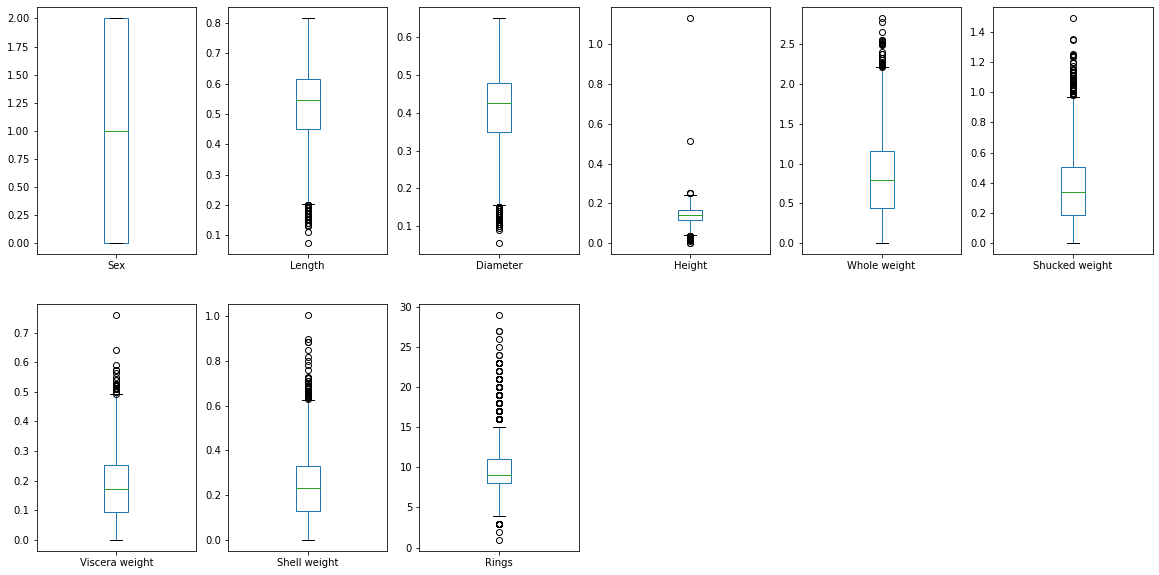

In [12]:
#checking Outliers : Step 2
df.plot(kind='box',subplots=True,layout=(2,6),figsize=(20,10))

Observation:
    
    Input columns the Std dev is in range +-1
    Skewness: we have skewness on Hieght column.
    Outliers: in plot diagram we can see the Data lies out of 100th percentile in many columns
    
    

# Checking for Null values

In [13]:
df.isnull().sum()
# No Null values are present

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

# checking data distribution

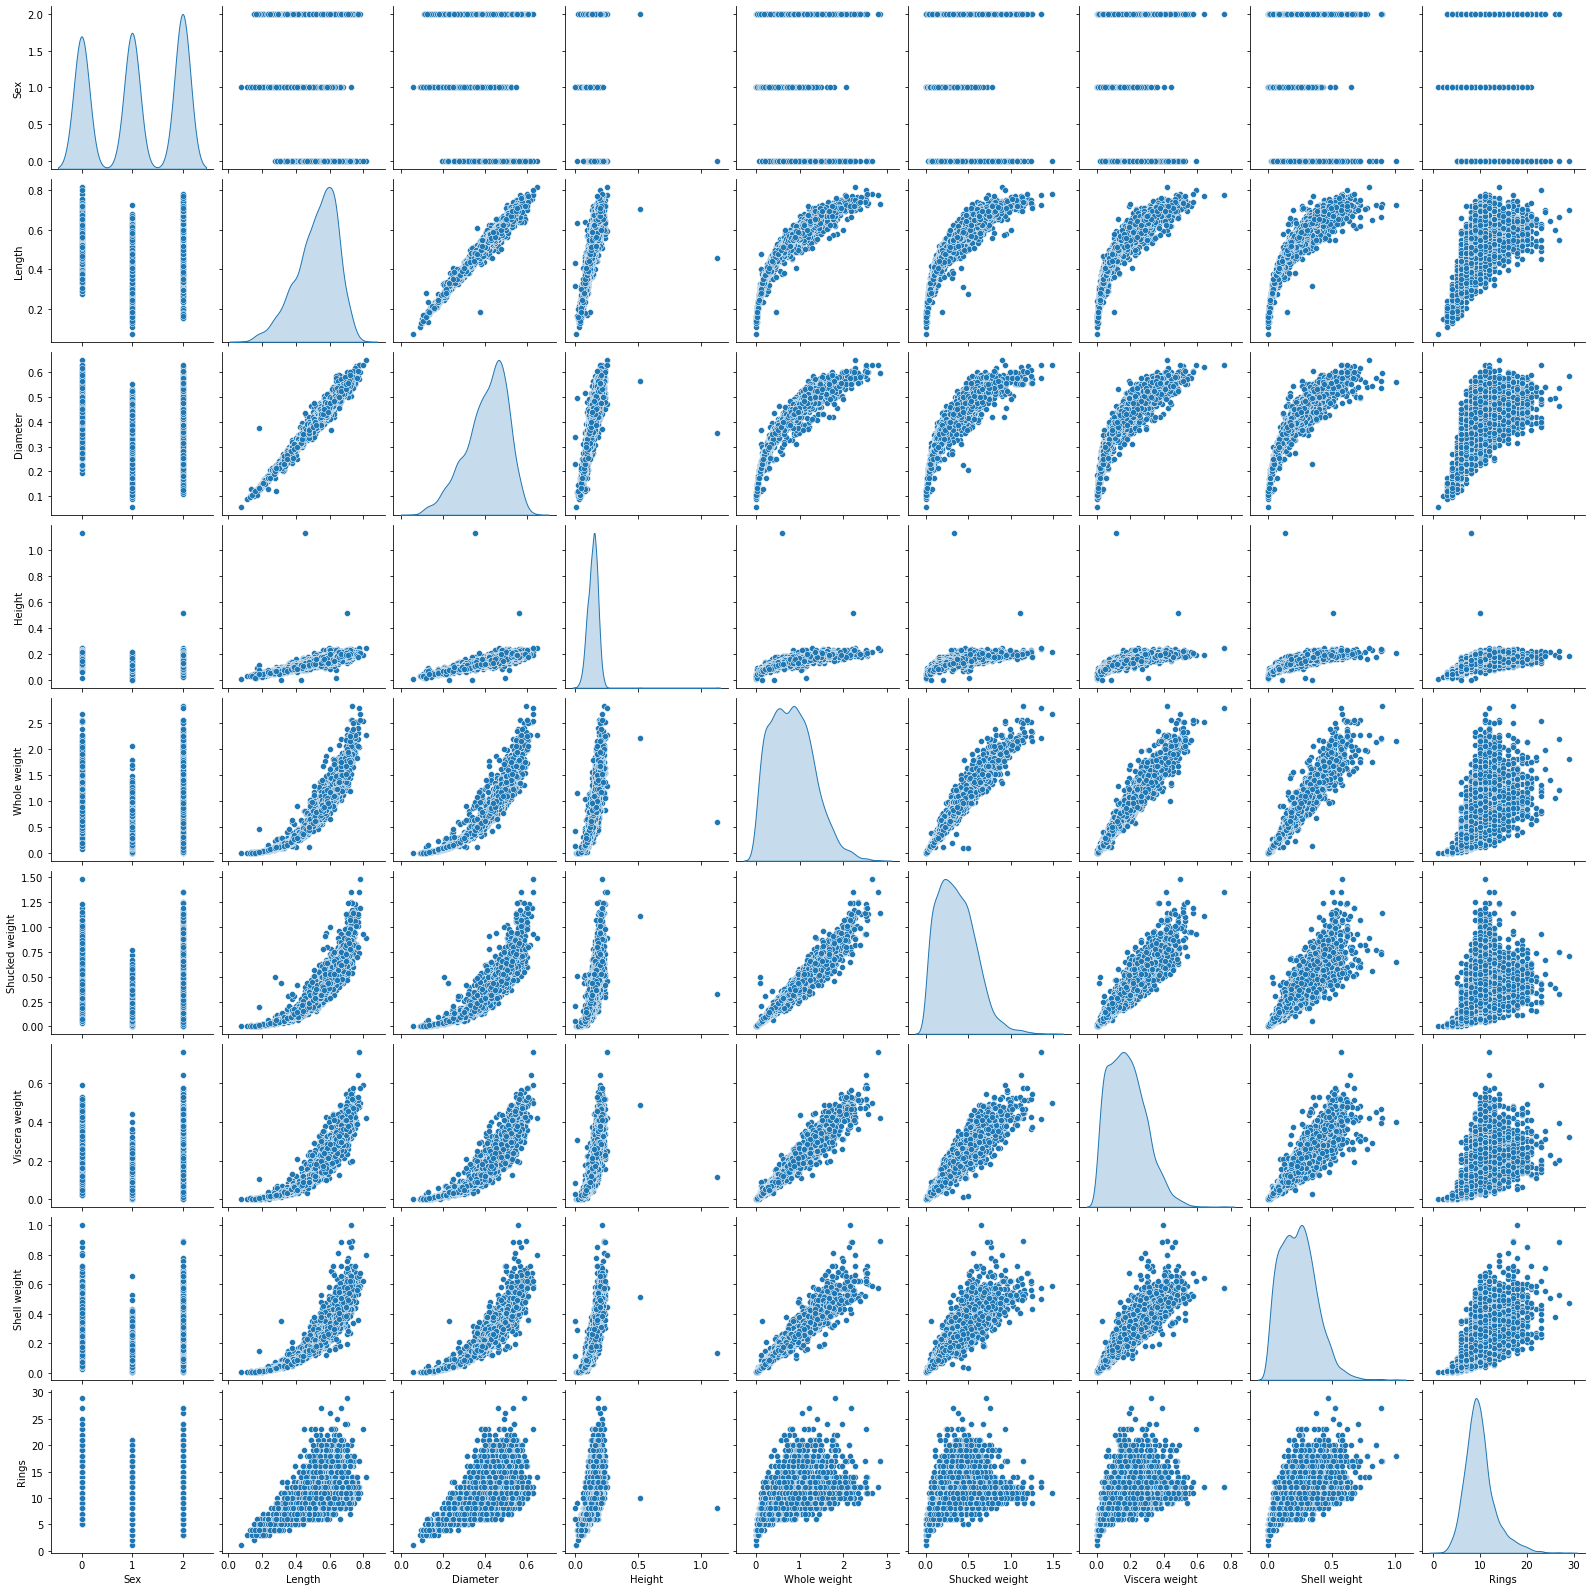

In [14]:
sns.pairplot(data=df,diag_kind='kde')

Need to check correlation with Rings and Input columns

# Checking Correlation

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

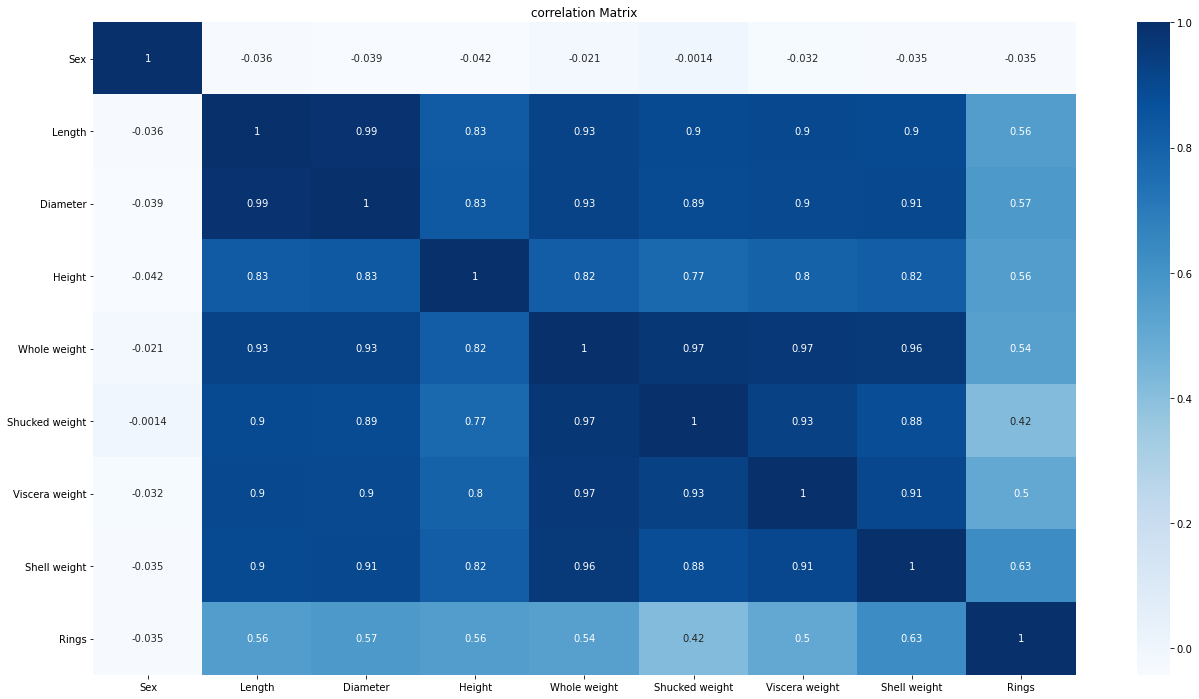

In [16]:
corr_mat=df.corr()

plt.figure(figsize=[22,12])
sns.heatmap(corr_mat,annot=True,cmap="Blues")
plt.title("correlation Matrix")
plt.show()

<AxesSubplot:xlabel='Rings', ylabel='Sex'>

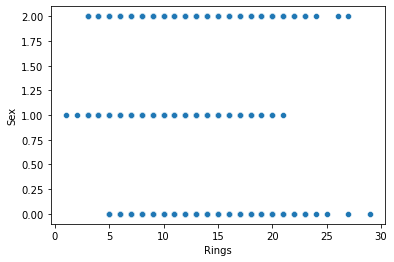

In [17]:
import seaborn as sns
sns.scatterplot(x="Rings",y="Sex",data=df) 

As suggested by Shankar Sir, need to Add Age column based on Rings

In [18]:
df['Age']=0

In [19]:
def update_age (row):
    if row['Rings']>=1 and row['Rings']<=8:
        return 1
    elif row['Rings']>=9 and row['Rings']<=10:
        return 2
    elif row['Rings']>=11 and row['Rings']<=29:
        return 3
    return 0

In [20]:
df['Age']=df.apply(lambda row: update_age(row),axis=1)

In [21]:
df.dtypes

Sex                 int32
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
Age                 int64
dtype: object

In [22]:
df.head(15)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,3
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,1
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,2
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,2
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,1
5,1,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8,1
6,0,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20,3
7,0,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16,3
8,2,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9,2
9,0,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19,3


In [23]:
#checking Correlation again
df.corr()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
Sex,1.000000,-0.036066,-0.038874,-0.042077,-0.021391,-0.001373,-0.032067,-0.034854,-0.034627,-0.032806
Length,-0.036066,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720,0.583693
Diameter,-0.038874,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660,0.599885
Height,-0.042077,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467,0.562294
Whole weight,-0.021391,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390,0.581990
Shucked weight,-0.001373,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884,0.493517
Viscera weight,-0.032067,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819,0.564357
Shell weight,-0.034854,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574,0.632789
Rings,-0.034627,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000,0.825035
Age,-0.032806,0.583693,0.599885,0.562294,0.581990,0.493517,0.564357,0.632789,0.825035,1.000000


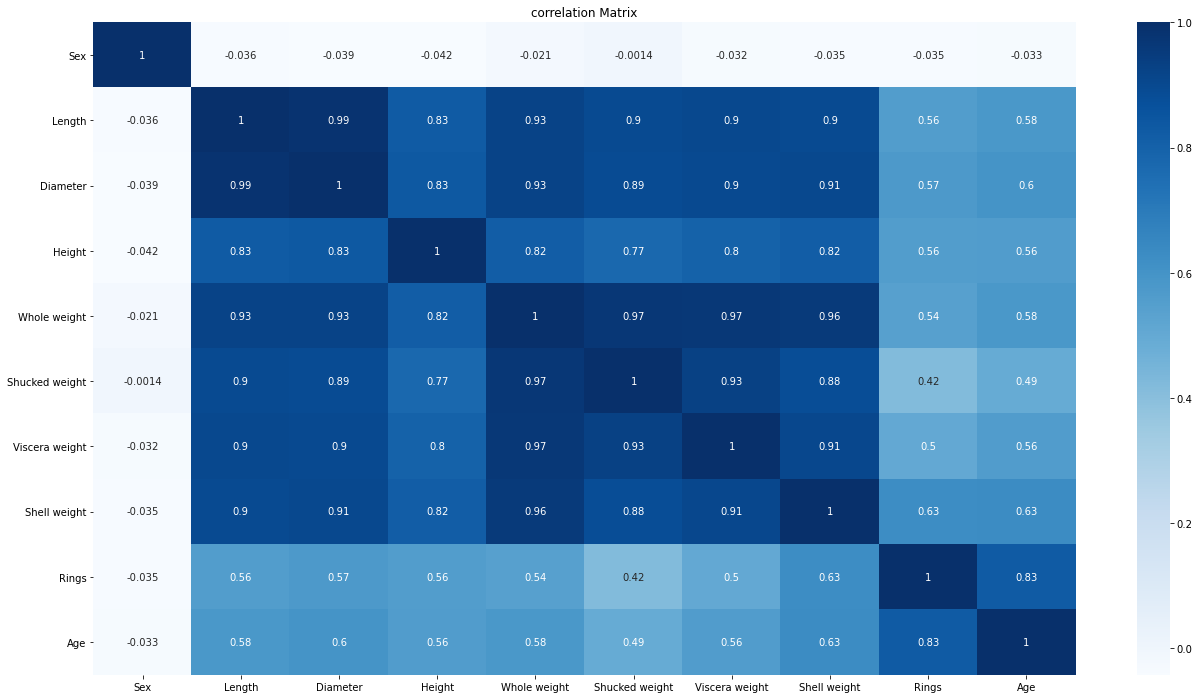

In [24]:
#checking correlation with Age
corr_mat=df.corr()

plt.figure(figsize=[22,12])
sns.heatmap(corr_mat,annot=True,cmap="Blues")
plt.title("correlation Matrix")
plt.show()

Here we cn see Sex column is less correlated with RIngs but it is around 0.03 so we will not going to drop this column as it is not highly negative correlated

# removing outliers by zscore method

In [25]:
 from scipy.stats import zscore

In [26]:
z=np.abs(zscore(df))
z

array([[1.15198011, 0.57455813, 0.43214879, ..., 0.63821689, 1.57154357,
        1.19827209],
       [1.15198011, 1.44898585, 1.439929  , ..., 1.21298732, 0.91001299,
        1.2214439 ],
       [1.28068972, 0.05003309, 0.12213032, ..., 0.20713907, 0.28962385,
        0.0115859 ],
       ...,
       [1.15198011, 0.6329849 , 0.67640943, ..., 0.49695471, 0.28962385,
        0.0115859 ],
       [1.28068972, 0.84118198, 0.77718745, ..., 0.41073914, 0.02057072,
        0.0115859 ],
       [1.15198011, 1.54905203, 1.48263359, ..., 1.84048058, 0.64095986,
        1.19827209]])

In [27]:
threshold=3
print(np.where(z>3))


(array([   6,   72,   81,   83,  129,  163,  164,  165,  165,  165,  166,
        166,  167,  168,  170,  181,  232,  236,  236,  236,  237,  237,
        238,  238,  239,  270,  275,  277,  278,  294,  310,  313,  314,
        334,  351,  355,  358,  358,  362,  375,  416,  417,  428,  431,
        433,  469,  478,  480,  501,  526,  526,  530,  572,  628,  673,
        674,  675,  678,  694,  696,  696,  719,  719,  720,  720,  744,
        754,  756,  811,  891,  891,  891, 1048, 1051, 1051, 1052, 1193,
       1197, 1199, 1202, 1204, 1206, 1206, 1207, 1207, 1207, 1207, 1209,
       1209, 1257, 1417, 1417, 1418, 1422, 1426, 1427, 1427, 1427, 1428,
       1429, 1429, 1528, 1754, 1756, 1757, 1759, 1761, 1762, 1762, 1762,
       1763, 1763, 1763, 1821, 1982, 1986, 1987, 1987, 2051, 2090, 2108,
       2108, 2114, 2114, 2157, 2161, 2176, 2180, 2199, 2201, 2208, 2209,
       2274, 2275, 2305, 2334, 2334, 2334, 2335, 2344, 2358, 2368, 2381,
       2436, 2459, 2471, 2544, 2623, 2624, 2624, 2

In [37]:
df_new=df[(z<3).all(axis=1)]

In [38]:
df_new

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,3
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,1
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,2
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,2
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,1
...,...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,3
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,2
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,2
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,2


# Removing Skewness from Height Column using boxcox method

<AxesSubplot:ylabel='Frequency'>

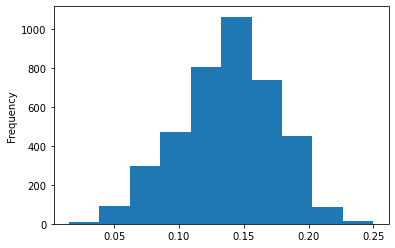

In [39]:
df_new['Height'].plot.hist()

In [40]:
from scipy.stats import boxcox
df_new['Height']= boxcox(df_new['Height'],0)

<AxesSubplot:ylabel='Frequency'>

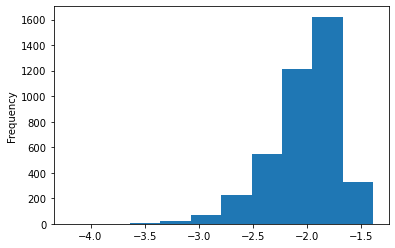

In [32]:
df_new['Height'].plot.hist()

Checking Normalization for other columns

In [41]:
df_new.describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
count,4027.000000,4027.000000,4027.000000,4027.000000,4027.000000,4027.000000,4027.000000,4027.000000,4027.000000,4027.000000
mean,1.051403,0.520987,0.405300,-2.022902,0.802805,0.349099,0.175718,0.230676,9.738763,1.985597
std,0.818071,0.115910,0.095903,0.308539,0.456192,0.206406,0.103350,0.127939,2.864691,0.821223
min,0.000000,0.165000,0.115000,-4.199705,0.014500,0.005500,0.000500,0.005000,3.000000,1.000000
25%,0.000000,0.450000,0.345000,-2.162823,0.438000,0.182000,0.091750,0.127750,8.000000,1.000000
50%,1.000000,0.540000,0.420000,-1.966113,0.783000,0.329500,0.167000,0.225000,9.000000,2.000000
75%,2.000000,0.610000,0.480000,-1.801810,1.131250,0.493500,0.246500,0.320000,11.000000,3.000000
max,2.000000,0.760000,0.605000,-1.386294,2.238500,1.017000,0.492500,0.655000,19.000000,3.000000


<AxesSubplot:xlabel='Shucked weight', ylabel='Density'>

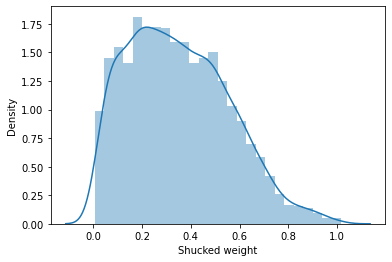

In [42]:
sns.distplot(df_new["Shucked weight"])

<AxesSubplot:xlabel='Length', ylabel='Density'>

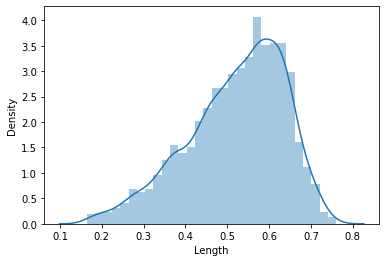

In [43]:
sns.distplot(df_new["Length"])

<AxesSubplot:ylabel='Frequency'>

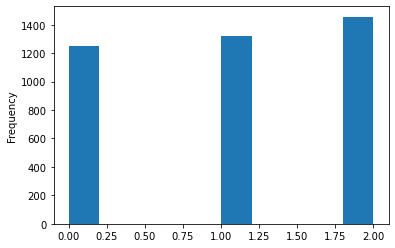

In [44]:
df_new['Sex'].plot.hist()

Now we have checked with Null values which is not present

Done with Removing Outliers

Done with Removing Skwness

will proceed further with test and Training Data

# Training and Testing Model

In [45]:
features=df_new.drop("Rings",axis=1)

In [46]:
target=df_new['Rings']

In [47]:
features.head(10)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,2,0.455,0.365,-2.353878,0.5140,0.2245,0.1010,0.150,3
1,2,0.350,0.265,-2.407946,0.2255,0.0995,0.0485,0.070,1
2,0,0.530,0.420,-2.002481,0.6770,0.2565,0.1415,0.210,2
3,2,0.440,0.365,-2.079442,0.5160,0.2155,0.1140,0.155,2
4,1,0.330,0.255,-2.525729,0.2050,0.0895,0.0395,0.055,1
5,1,0.425,0.300,-2.353878,0.3515,0.1410,0.0775,0.120,1
7,0,0.545,0.425,-2.079442,0.7680,0.2940,0.1495,0.260,3
8,2,0.475,0.370,-2.079442,0.5095,0.2165,0.1125,0.165,2
9,0,0.550,0.440,-1.897120,0.8945,0.3145,0.1510,0.320,3
10,0,0.525,0.380,-1.966113,0.6065,0.1940,0.1475,0.210,3


In [48]:
target.head(10)

0     15
1      7
2      9
3     10
4      7
5      8
7     16
8      9
9     19
10    14
Name: Rings, dtype: int64

# To find Best classifier model

In [49]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
sv=SVC()
from sklearn.neighbors import KNeighborsClassifier
knc=KNeighborsClassifier()
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

First we will check with CLasssfier as it will Have Accuracy, confusion ans classification report

In [50]:
model=(dt,sv,knc)

In [91]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report

for m in model:
    features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.33,random_state=400)
    m.fit(features_train,target_train)
    m.score(features_train,target_train)
    pred_test=m.predict(features_test)
    print('Accuracy Score',m,'is:')
    print(accuracy_score(target_test,pred_test))
    #print(confusion_matrix(target_test,pred_test))
    #print(classification_report(target_test,pred_test))

Accuracy Score DecisionTreeClassifier() is:
0.40632054176072235
Accuracy Score SVC() is:
0.49887133182844245
Accuracy Score KNeighborsClassifier() is:
0.44620015048908956


# Decision Tree

In [52]:
#CHECKING WITH dECISION tREE FOR BEST tEST SIZE AND RANDOM STATE  
#FIRST random_state

maxAcc = 0
maxRs=0

for i in range(10,40):
    i1=i*0.01
    features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=i1)
    dt.fit(features_train,target_train)
    dt.fit(features_train,target_train)
    pred=dt.predict(features_test)
    acc=dt.score(features_test,target_test)
    #print('accuracy',acc,'Random state',i)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i
        #print('accuracy',maxAcc,'Random state',i)
print("Best test_size is",maxAcc*100,"on Random state",maxRs) 

Best test_size is 42.99900695134062 on Random state 25


In [53]:
#CHECKING WITH dECISION tREE FOR BEST tEST SIZE AND RANDOM STATE  
#Second TEST SIZE

maxAcc = 0
maxRs=0

for i in range(1,400):
    features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=.25,random_state=i)
    dt.fit(features_train,target_train)
    dt.fit(features_train,target_train)
    pred=dt.predict(features_test)
    acc=dt.score(features_test,target_test)
    #print('accuracy',acc,'Random state',i)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i
        #print('accuracy',maxAcc,'Random state',i)
print("Best random_state is",maxAcc*100,"on Random state",maxRs) 

#Here BEst Random size and Test size we are getting for Decision tree is 25% and 355 which is not acceptable as it is below 75%

Best random_state is 44.885799404170804 on Random state 355


# SVC()

In [54]:
#CHECKING WITH dECISION tREE FOR BEST tEST SIZE AND RANDOM STATE  
#FIRST random_state

maxAcc = 0
maxRs=0

for i in range(10,40):
    i1=i*0.01
    features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=i1)
    sv.fit(features_train,target_train)
    sv.fit(features_train,target_train)
    pred=sv.predict(features_test)
    acc=sv.score(features_test,target_test)
    #print('accuracy',acc,'Random state',i)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i
        #print('accuracy',maxAcc,'Random state',i)
print("Best test_size is",maxAcc*100,"on Random state",maxRs) 

Best test_size is 52.68595041322314 on Random state 12


In [55]:
#CHECKING WITH dECISION tREE FOR BEST tEST SIZE AND RANDOM STATE  
#Second TEST SIZE

maxAcc = 0
maxRs=0

for i in range(1,400):
    features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=.12,random_state=i)
    dt.fit(features_train,target_train)
    dt.fit(features_train,target_train)
    pred=dt.predict(features_test)
    acc=dt.score(features_test,target_test)
    #print('accuracy',acc,'Random state',i)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i
        #print('accuracy',maxAcc,'Random state',i)
print("Best random_state is",maxAcc*100,"on Random state",maxRs) 



Best random_state is 45.45454545454545 on Random state 175


Here BEst Random size and Test size we are getting for Decision tree is 12% and 175 which is not acceptable as it is below 75%

# KNeighborsClassifier

In [56]:
#CHECKING WITH dECISION tREE FOR BEST tEST SIZE AND RANDOM STATE  
#FIRST random_state

maxAcc = 0
maxRs=0

for i in range(10,40):
    i1=i*0.01
    features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=i1)
    knc.fit(features_train,target_train)
    knc.fit(features_train,target_train)
    pred=knc.predict(features_test)
    acc=knc.score(features_test,target_test)
    #print('accuracy',acc,'Random state',i)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i
        #print('accuracy',maxAcc,'Random state',i)
print("Best test_size is",maxAcc*100,"on Random state",maxRs) 

Best test_size is 47.87234042553192 on Random state 21


In [57]:
#CHECKING WITH dECISION tREE FOR BEST tEST SIZE AND RANDOM STATE  
#Second TEST SIZE

maxAcc = 0
maxRs=0

for i in range(1,400):
    features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=.21,random_state=i)
    dt.fit(features_train,target_train)
    dt.fit(features_train,target_train)
    pred=dt.predict(features_test)
    acc=dt.score(features_test,target_test)
    #print('accuracy',acc,'Random state',i)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i
        #print('accuracy',maxAcc,'Random state',i)
print("Best random_state is",maxAcc*100,"on Random state",maxRs) 



Best random_state is 44.32624113475177 on Random state 242


Here BEst Random size and Test size we are getting for Decision tree is 21% and 242 which is not acceptable as it is below 75%

# Linear Regression()

In [64]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [65]:
#CHECKING WITH dECISION tREE FOR BEST tEST SIZE AND RANDOM STATE  
#FIRST random_state

maxAcc = 0
maxRs=0

for i in range(10,40):
    i1=i*0.01
    features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=i1)
    lr.fit(features_train,target_train)
    lr.fit(features_train,target_train)
    pred=lr.predict(features_test)
    acc=lr.score(features_test,target_test)
    #prredint('accuracy',acc,'Random state',i)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i
        #print('accuracy',maxAcc,'Random state',i)
print("Best test_size is",maxAcc*100,"on Random state",maxRs) 

Best test_size is 80.34453713622408 on Random state 15


In [66]:
#CHECKING WITH dECISION tREE FOR BEST tEST SIZE AND RANDOM STATE  
#Second TEST SIZE

maxAcc = 0
maxRs=0

for i in range(1,400):
    features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=.15,random_state=i)
    lr.fit(features_train,target_train)
    lr.fit(features_train,target_train)
    pred=lr.predict(features_test)
    acc=lr.score(features_test,target_test)
    #print('accuracy',acc,'Random state',i)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i
        #print('accuracy',maxAcc,'Random state',i)
print("Best random_state is",maxAcc*100,"on Random state",maxRs) 



Best random_state is 82.13875959517351 on Random state 191


Here BEst Random size and Test size we are getting for Decision tree is 15% and 191 which is  acceptable as it is above 75%

In [93]:
features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.15,random_state=191)

In [94]:
lr.fit(features_train,target_train)

LinearRegression()

In [98]:
pred=lr.predict(features_test)

In [99]:
print(features_train.shape)
print(features_test.shape)
print(target_train.shape)
print(target_test.shape)

(3422, 9)
(605, 9)
(3422,)
(605,)


In [104]:
pred_test=lr.predict(features_test)
pred_train=lr.predict(features_train)
print(pred_test.shape)
print(pred_train.shape)

(605,)
(3422,)


In [101]:
print(r2_score(target_test,pred_test))

0.8213875959517352


# checking the cross validation score

In [109]:
train_accuracy=r2_score(target_train,pred_train)
test_accuracy=r2_score(target_test,pred_test)



from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,features,target,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold{j} the cv score is {cv_mean} and accuracy score for training is {train_accuracy}and accuracy for the testing is{test_accuracy}")
    
    

At cross fold2 the cv score is 0.7862193221530009 and accuracy score for training is 0.7821928845189552and accuracy for the testing is0.8213875959517352
At cross fold3 the cv score is 0.7808831083504955 and accuracy score for training is 0.7821928845189552and accuracy for the testing is0.8213875959517352
At cross fold4 the cv score is 0.7637397776937858 and accuracy score for training is 0.7821928845189552and accuracy for the testing is0.8213875959517352
At cross fold5 the cv score is 0.7610021451752484 and accuracy score for training is 0.7821928845189552and accuracy for the testing is0.8213875959517352
At cross fold6 the cv score is 0.7622260030464872 and accuracy score for training is 0.7821928845189552and accuracy for the testing is0.8213875959517352
At cross fold7 the cv score is 0.7685735624057995 and accuracy score for training is 0.7821928845189552and accuracy for the testing is0.8213875959517352
At cross fold8 the cv score is 0.7496030168986456 and accuracy score for training 

In [112]:
train_accuracy=r2_score(target_train,pred_train)
test_accuracy=r2_score(target_test,pred_test)



from sklearn.model_selection import cross_val_score
cv_score=cross_val_score(lr,features,target,cv=3)
cv_mean=cv_score.mean()
print(f"At cross fold{j} the cv score is {cv_mean} and accuracy score for training is {train_accuracy}and accuracy for the testing is{test_accuracy}")
    
    

At cross fold9 the cv score is 0.7808831083504955 and accuracy score for training is 0.7821928845189552and accuracy for the testing is0.8213875959517352


we are getting higher accuracy with CV=3 hence selected the same

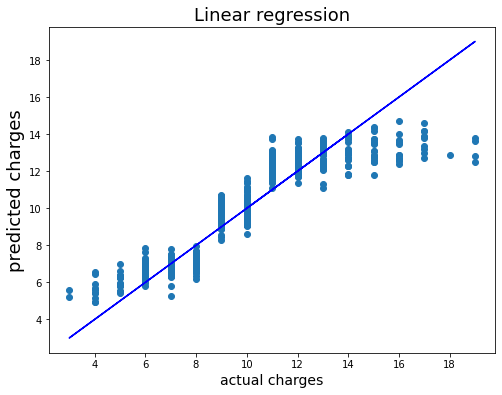

In [113]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=target_test,y=pred_test)
plt.plot(target_test,target_test,color='b')
plt.xlabel('actual charges',fontsize=14)
plt.ylabel('predicted charges',fontsize=18)
plt.title('Linear regression',fontsize=18)
plt.show()

It will show the best line to cover multiple points

# Hyper parameter tunning

In [114]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings 
warnings.filterwarnings ('ignore')

In [115]:
from sklearn.linear_model import Lasso

In [116]:
parameters={'alpha':[0.0001,0.001,0.01,0.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(features_train,target_train)

print(clf.best_params_)

{'alpha': 0.0001, 'random_state': 0}


In [117]:
ls=Lasso(alpha=0.0001,random_state=0)
ls.fit(features_train,target_train)
ls.score(features_train,target_train)
pred_ls=ls.predict(features_test)
lss=r2_score(target_test,pred_ls)
lss

0.8212189108808238

In [118]:
from sklearn.model_selection import cross_val_score
cv_score=cross_val_score(ls,features,target,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.7611064584004821

# Ensemble Technique

In [119]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameters={'criterion':['mse','mae'],'max_features':['auto','sqrt','log2']}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(features_train,target_train)

print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'sqrt'}


In [121]:
rf=RandomForestRegressor(criterion='mse',max_features='auto')
rf.fit(features_train,target_train)
rf.score(features_train,target_train)
pred_decision=rf.predict(features_test)

rfs=r2_score(target_test,pred_decision)
print('R2_score',rfs*100)

rfscore=cross_val_score(rf,features,target,cv=5)
rfc=rfscore.mean()
print('cross_val+score',rfc*100)


R2_score 82.89998836036315
cross_val+score 79.24162863227775


Model Accuracy = 82.89

Cross validation = 79.19%